In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                                 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

In [2]:
sensor_data=pd.read_csv(r"C:\Users\lenovo\Downloads\archive\sensor.csv")
sensor_data

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [3]:
def get_class_distribution(df, col=None):
    """
    Function to plot class distribution
    """
    if col == 'machine_status': # if column = machine_status
        # Counting class labels
        label_count = df['machine_status'].value_counts() 
    elif col == 'label': # if column = label
        label_count = df['label'].value_counts()
    else:
        label_count = df.value_counts()
    # bar plot
    plot = sns.barplot(list(label_count.index), list(label_count.values)) 
    plt.title('Class Distribution')
    plt.xlabel('Class Label')
    plt.ylabel('Count')

    # adding class count to the barplot
    for patch in plot.patches:
        # formatting and positioning the count values
        plot.annotate('{:n}'.format(patch.get_height()), 
                      (patch.get_x()+0.25, patch.get_height()+1)) 
    plt.show()

[1 1 1 ... 1 1 1]
1    205836
2     14477
0         7
Name: count, dtype: int64


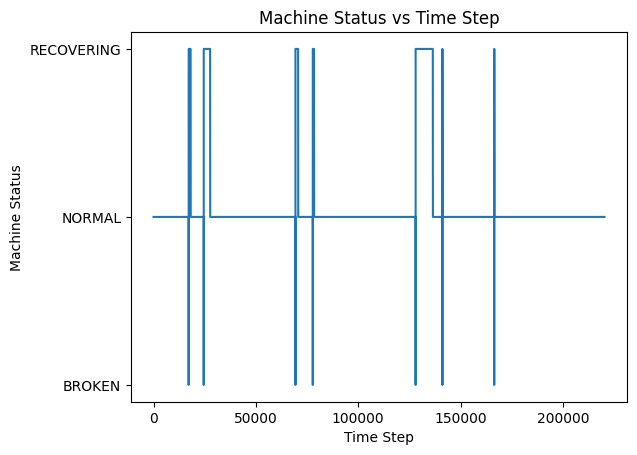

In [4]:
# label encoding
le = preprocessing.LabelEncoder() # creating label encoder
y = le.fit_transform(sensor_data['machine_status']) # fitting on labels
x = list(sensor_data.index)
print(y)
s=pd.Series(y)
print(s.value_counts())
plt.plot(x, y)
plt.xlabel('Time Step')
plt.ylabel('Machine Status')
plt.title('Machine Status vs Time Step')

encode_labels = list(le.transform(list(le.classes_))) # encoded labels
labels = list(le.classes_) # labels
plt.yticks(encode_labels, labels)
plt.show()

Class distribution after re-labeling the data


----------------------------------------------------------------------
Machine status after re-labeling the data



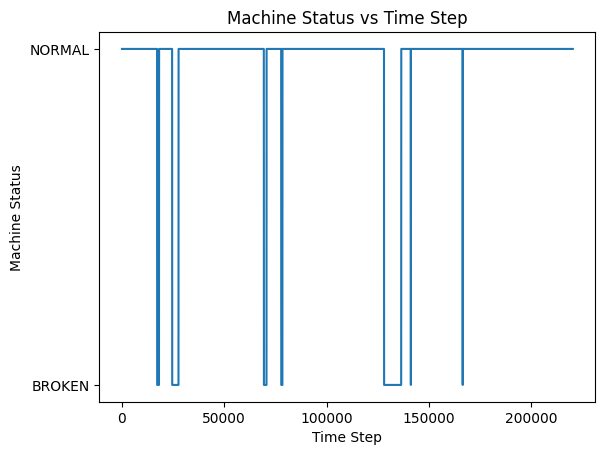

In [5]:
# encoding labels as 0 and 1
# 0 = normal
# 1 = broken
sensor_data['label'] = sensor_data['machine_status'].map(lambda label: 0
                                                if label == 'NORMAL' else 1) 

print("Class distribution after re-labeling the data")
print()
#get_class_distribution( 'label')
print()
# print('-*'*40)
print('-'*70)

# changing machine status recovery to broken
sensor_data['new_machine_status'] = sensor_data['machine_status'].map(lambda 
                        label:  'BROKEN' if label != 'NORMAL' else 'NORMAL')


print("Machine status after re-labeling the data")
print()
x = list(sensor_data.index) # fitting on labels

# reversing labels for better visualization
y = list(sensor_data['label'].map(lambda label:  1 if label == 0 else 0))

plt.plot(x, y)
plt.xlabel('Time Step')
plt.ylabel('Machine Status')
plt.title('Machine Status vs Time Step')

encode_labels = [0, 1] # encoded labels
labels = ['BROKEN', 'NORMAL'] # labels 
plt.yticks(encode_labels, labels)
plt.show()

Missing Value Count



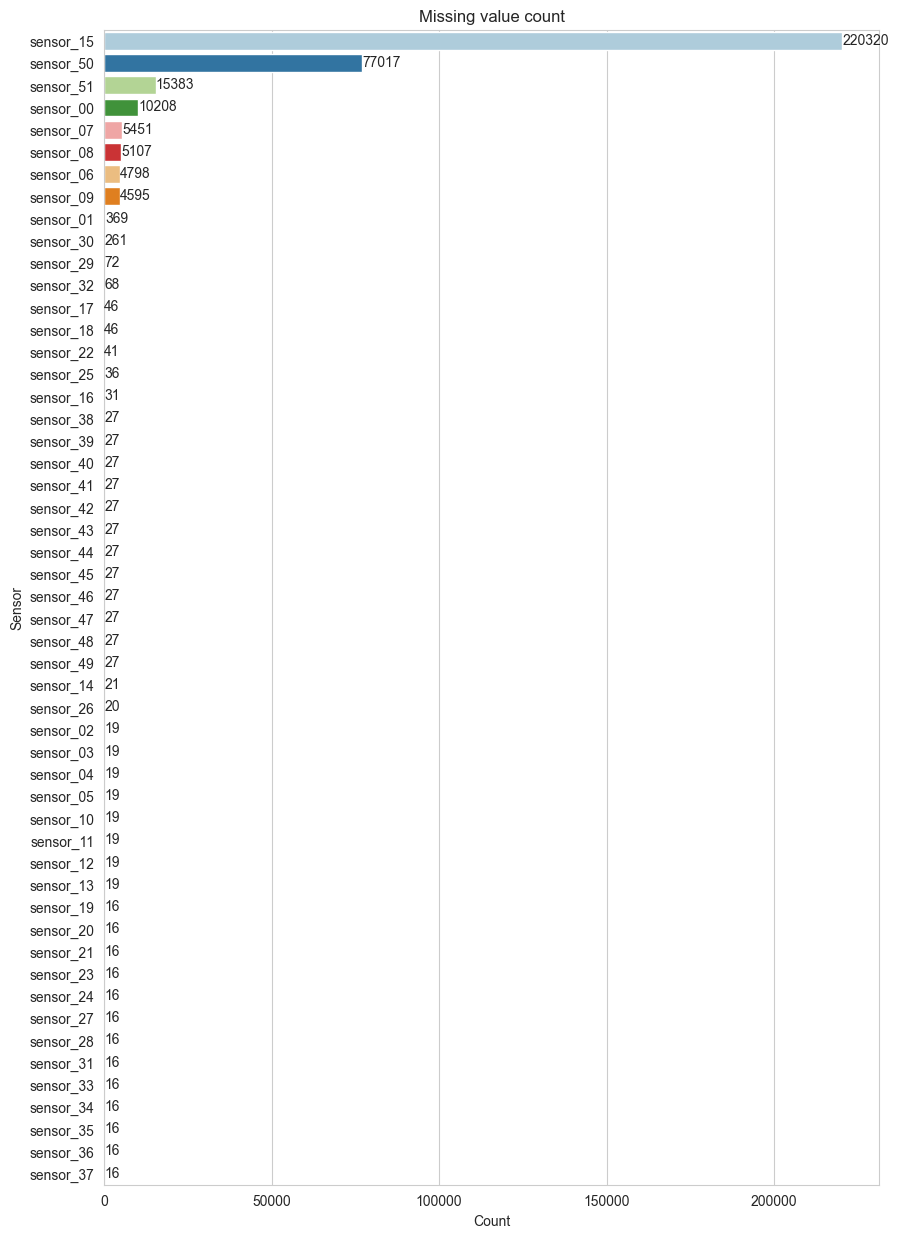

In [6]:
print("Missing Value Count")
print()
null_count = sensor_data.isna().sum()# count null values
# considering only sensor columns
null_count = null_count[2:-3] 

count_dict = {}

# creating dictionary of column and null value count
for i, j in zip(null_count.index, null_count.values):
    count_dict[i] = j

# sorting the dictionary
count_dict = {k:v for k, v in sorted(count_dict.items(), 
                                     key=lambda item: item[1], reverse=True)}
sns.set_style(style="whitegrid")
plt.figure(figsize=(10,15))
plot = sns.barplot(x=list(count_dict.values()), 
                   y=list(count_dict.keys()), palette='Paired')

# ref: https://stackoverflow.com/questions/43214978/seaborn-
# barplot-displaying-values/51535326#51535326
for p in plot.patches:
    _x = p.get_x() + p.get_width() + 0.5 # adjusting the label along x axis
    _y = p.get_y() + p.get_height() - 0.25 # adjusting the label along y axis
    value = int(p.get_width())
    plot.text(_x, _y, value, ha="left")

plot.set_title("Missing value count")
plot.set_ylabel("Sensor")
plot.set_xlabel("Count")
plt.show()

Percentage Missing Values 



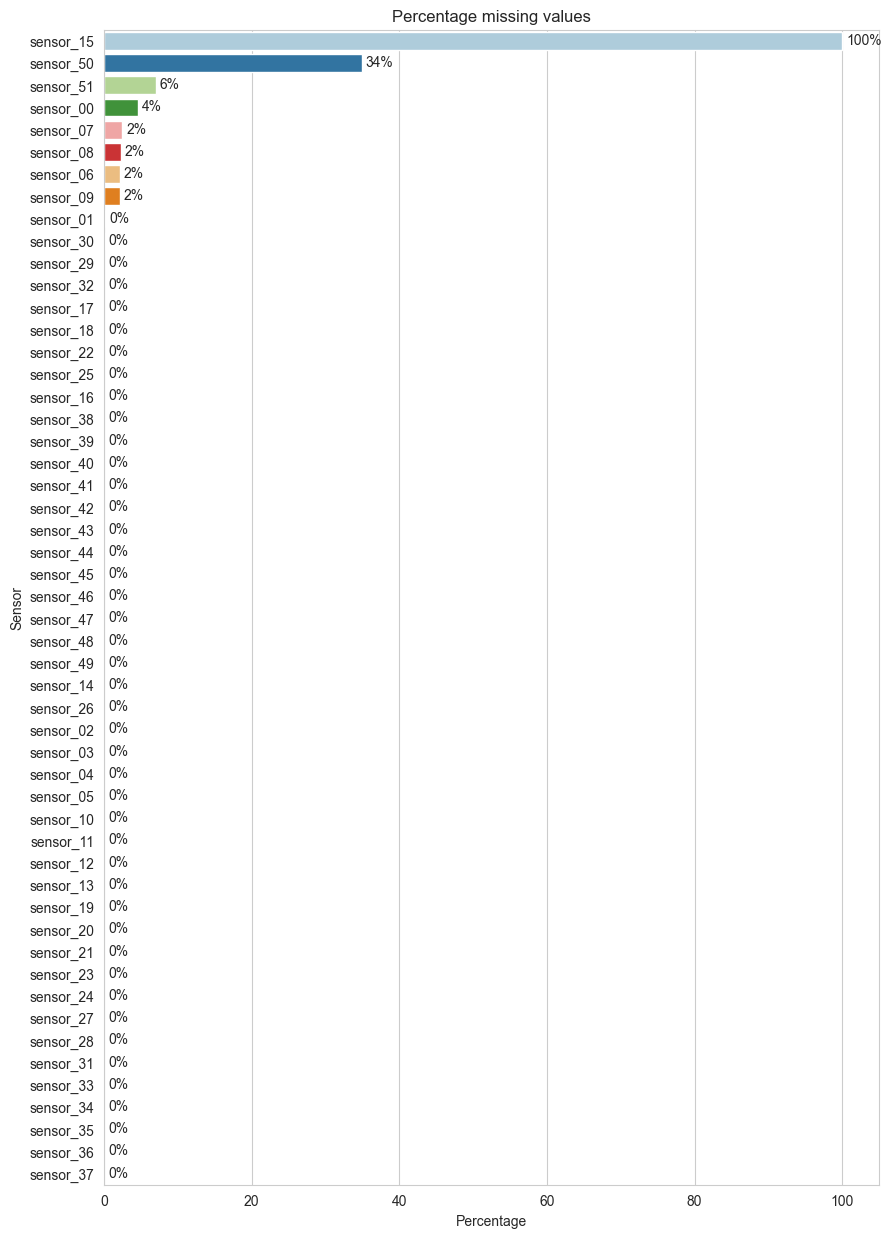

In [7]:
print("Percentage Missing Values ")
print()

# percentage null values
null_count = sensor_data.isna().sum()/sensor_data.shape[0] * 100 
null_count = null_count[2:-3] # considering only sensor columns

percent_null = {}

# creating dictionary of column and percentage null value
for i, j in zip(null_count.index, null_count.values):
    percent_null[i] = j

# sorting the dictionary
percent_null = {k:v for k, v in sorted(percent_null.items(), 
                                       key=lambda item: item[1], reverse=True)}

sns.set_style(style="whitegrid")
plt.figure(figsize=(10,15))

plot = sns.barplot(x=list(percent_null.values()), 
                   y=list(percent_null.keys()), palette='Paired')

# ref: https://stackoverflow.com/questions/43214978/seaborn-barplot-
# displaying-values/51535326#51535326
for p in plot.patches:
    _x = p.get_x() + p.get_width() + 0.5
    _y = p.get_y() + p.get_height() - 0.25
    value = f'{int(p.get_width())}%'
    plot.text(_x, _y, value, ha="left")

plot.set_title("Percentage missing values")
plot.set_ylabel("Sensor")
plot.set_xlabel("Percentage")
plt.show()

In [8]:
def plot_missing (sensor_num, df):
    """
    Function to plot machine status, sensor readings variation with time
    Also to plot missing values
    """
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[[sensor_num]])
    null_sensor = df[df[sensor_num].isnull()][sensor_num]

    plt.figure(figsize=(10, 4))
    plt.plot(list(df.index), list(scaled), label='readings')
    plt.scatter(list(null_sensor.index), [0]*len(null_sensor.index), 
                color = 'red', label='missing values')
    
    # reversing labels for better visualization
    y = list(sensor_data['label'].map(lambda label:  1 if label == 0 else 0))
    plt.plot(list(df.index), y, color = 'green', label='machine status')

    encode_labels = [1, 0] # encoded labels
    labels = ['NORMAL', 'BROKEN'] # labels
    plt.yticks(encode_labels, labels)

    plt.legend()
    plt.xlabel('Time Step')
    plt.ylabel(f'{sensor_num} readings')
    plt.title(f'{sensor_num} readings vs Time')
    plt.show()

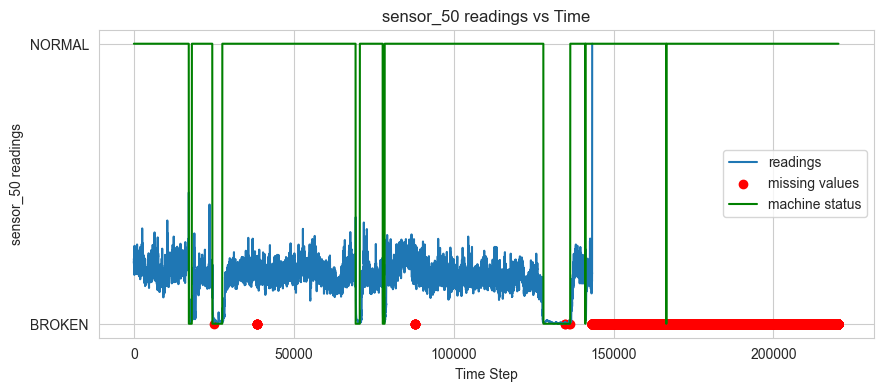

In [9]:
plot_missing('sensor_50', sensor_data)

In [10]:
# dropping columns machine_status, new_machine_status and sensor_15
sensor_data = sensor_data.drop(columns=['machine_status', 
                                        'new_machine_status', 
                                        'sensor_15'], axis=1)
# dropping column unnamed
sensor_data = sensor_data.drop(sensor_data.columns[0], axis=1)

# filling missing values with -1
for sensor in list(sensor_data.columns)[1:-1]:
    sensor_data[sensor].fillna(-1, inplace=True)
sensor_data.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,label
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0


In [11]:
def shift_labels(sensor_list, df):
    """
    Function to shift labels by 10 min
    """
    new_features = {}

    for sensor in sensor_list:
        new_features[sensor] = df[sensor]

    labels = [None] * df.shape[0]

    for i in range(0, df.shape[0]-10):
        labels[i] = sensor_data['label'][i+10]
    
    new_features['label'] = labels
    new_df = pd.DataFrame(new_features)
    # dropping last rows with null value
    new_df.drop(new_df.tail(10).index,inplace=True)
    return new_df
data_10min_shift = shift_labels(sensor_data.columns[1:-1], sensor_data)
data_10min_shift.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,label
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0.0
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0.0
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0.0
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0.0
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0.0


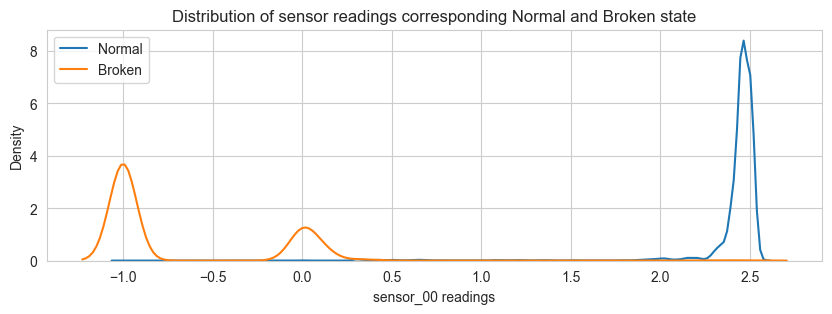

In [12]:
def get_distrib_plot(sensor, df):
    """
    Function to plot distribution of sensor readings for Normal and Broken state
    """
    # sensor values corrensponding machine status Normal
    normal = df[df['label']==0][sensor].values
    # sensor values corrensponding machine status Broken
    broken = df[df['label']==1][sensor].values

    plt.figure(figsize=(10,3))
    # distribution for normal state
    sns.distplot(normal, hist=False, label="Normal") 
    # distribution for broken state
    sns.distplot(broken, hist=False, label="Broken") 
    plt.title('Distribution of sensor readings corresponding Normal and Broken state')
    plt.xlabel(f'{sensor} readings')
    plt.legend()
    plt.show()

get_distrib_plot('sensor_00', data_10min_shift)

In [13]:
final_sensors = ['sensor_00', 'sensor_04', 'sensor_06', 'sensor_07', 
                 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 
                 'sensor_12']

In [14]:
def get_new_features(sensor_list, df):
    """
    Function to find distance from normal state mean value 
    """
    new_features = {}
    for sensor in sensor_list:
        val = df[sensor] - np.mean(df[df['label']==0][sensor].values)
        new_features[sensor] = val
    new_features['label'] = df['label']
    new_df = pd.DataFrame(new_features)
    return new_df
# dist from mean of normal state
df_dist_from_norm_mean = get_new_features(final_sensors, data_10min_shift)
df_dist_from_norm_mean.head()

,sensor_00,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,label
0,0.045599,8.811367,-0.452019,-0.033137,0.090218,-0.03195,-7.029786,2.768899,-0.045803,0.0
1,0.045599,8.811367,-0.452019,-0.033137,0.090218,-0.03195,-7.029786,2.768899,-0.045803,0.0
2,0.024939,13.325267,-0.538829,-0.127167,0.140858,-0.07535,-6.389416,3.421909,0.925977,0.0
3,0.040679,2.561367,-0.546059,0.082613,0.220428,-0.00301,-5.677416,3.900749,0.509247,0.0
4,0.025923,10.894667,-0.509889,0.046443,0.220428,-0.00301,-4.767796,4.307659,0.789057,0.0


In [15]:
def percentage_cls_distrib(df):
    """
    function to get % class distribution among train and test data
    """
    total = len(df)
    class_0 = round(df.value_counts()[0] *100 / total, 2)
    class_1 = round(df.value_counts()[1] *100 / total, 2)
    print(f"% Normal class data points = {class_0}")
    print(f"% Broken class data points= {class_1}")

In [16]:
# y data
data_y = df_dist_from_norm_mean['label']
# x data
data_x = df_dist_from_norm_mean.drop(columns='label')

train_dataPoints = 131000

X_train = data_x[:train_dataPoints]
y_train = data_y[:train_dataPoints]

X_test = data_x[train_dataPoints: ]
y_test = data_y[train_dataPoints: ]
print("Training data")
print()
#get_class_distribution(y_train)
percentage_cls_distrib(y_train)

Training data

% Normal class data points = 93.17
% Broken class data points= 6.83


In [17]:
print("Test data")
print()
#get_class_distribution(y_test)
percentage_cls_distrib(y_test)

Test data

% Normal class data points = 93.8
% Broken class data points= 6.2


In [18]:
def normalize_df(df_train, df_test):
    """
    Function to normalize the data using minimax scaler
    """
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(df_train.values)
    scaled_test = scaler.transform(df_test.values)
    train = pd.DataFrame(data=scaled_train, 
                         columns=df_train.columns, 
                         index=df_train.index)
    test = pd.DataFrame(data=scaled_test, 
                        columns=df_test.columns, 
                        index=df_test.index)
    return train, test

In [19]:
X_train, X_test = normalize_df(X_train, X_test)
X_train.head()

,sensor_00,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0.976438,0.793227,0.619817,0.698958,0.681570,0.689154,0.495772,0.795479,0.698199
1,0.976438,0.793227,0.619817,0.698958,0.681570,0.689154,0.495772,0.795479,0.698199
2,0.970617,0.798863,0.616083,0.695122,0.683654,0.687291,0.504077,0.806184,0.719325
3,0.975052,0.785424,0.615772,0.703681,0.686927,0.690396,0.513311,0.814034,0.710265
4,0.970894,0.795828,0.617328,0.702205,0.686927,0.690396,0.525107,0.820705,0.716348


In [20]:
X_test.head()

,sensor_00,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
131000,0.0,0.005558,0.0,0.0,0.0,0.0,0.016478,0.017532,0.021739
131001,0.0,0.005414,0.0,0.0,0.0,0.0,0.016478,0.017532,0.021739
131002,0.0,0.005414,0.0,0.0,0.0,0.0,0.016478,0.017532,0.021739
131003,0.0,0.005125,0.0,0.0,0.0,0.0,0.016478,0.017532,0.021739
131004,0.0,0.004742,0.0,0.0,0.0,0.0,0.016478,0.017532,0.021739


In [21]:
folds = TimeSeriesSplit(n_splits=5)
folds

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [22]:
def get_cv_plot(validation, parameter):
    """
    Function to plot cross validation metric
    """
    # creating dataframe of cross validation results
    results = pd.DataFrame.from_dict(validation.cv_results_)
    results = results.sort_values([parameter])

    # Get Mean score for each grid search for train data
    train_macro_f1= validation.cv_results_['mean_train_score']
    # Get Mean score for each grid search for cross validation data
    cv_macro_f1 = validation.cv_results_['mean_test_score'] 
    C =  results[parameter]

    # plotting the results
    plt.figure(figsize=(7,4))
    plt.plot(C, train_macro_f1, label='Train macro f1')
    plt.plot(C, cv_macro_f1, label='CV macro f1')
    plt.scatter(C, train_macro_f1, label='Train macro f1 points')
    plt.scatter(C, cv_macro_f1, label='CV macro f1 points')

    plt.xscale('log')
    plt.legend()
    plt.xlabel("hyperparameter")
    plt.ylabel("macro f1-score")
    plt.title("Macro f1-score Vs Hyperparameter")
    plt.grid( linestyle='-', linewidth=0.5)
    plt.grid()
    plt.show()

In [23]:
def get_confusion_mat( y_true , y_pred):
    """
    Function to plot confusion matrix
    """
    # counfusion matrix
    confusion_mat = confusion_matrix(y_true , y_pred)
        
    labels = ["Normal", "Broken"]

    # plot heat map of confusion matrix
    sns.heatmap(confusion_mat, annot=True, fmt='', cmap='Greens',
                xticklabels=labels, 
                yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [24]:
def get_result( model , x_test , y_test ):
    """
    Function to check model performance on test data and print the metric
    """
    # prediction on test data
    y_pred = model.predict(x_test) 
    # get the metric
    f1_macro = f1_score(y_test, y_pred, average='macro')
    print(f"Macro F1-Score:{round(f1_macro, 4)} ")
    print()

    print("Confusion Matrix")
    get_confusion_mat(y_test, y_pred)

In [25]:
def get_cv_heatmap(validation):
    """
    Function to plot heat map of cross validation results
    """
    # reference: https://stackoverflow.com/questions/48791709/how-to-plot-a-
    # heat-map-on-pivot-table-after-grid-search

    # Get Mean score for each grid search for train data
    train = pd.pivot_table(pd.DataFrame(validation.cv_results_),
                              values='mean_train_score', 
                           index='param_max_depth', 
                           columns='param_n_estimators')

    # Get Mean score for each grid search for cross validation data
    test = pd.pivot_table(pd.DataFrame(validation.cv_results_),
                            values='mean_test_score', 
                          index='param_max_depth', 
                          columns='param_n_estimators')
    
    # plotting the results
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,5))
    sns.heatmap(train, annot=True, 
                cmap="Greens", 
                fmt='.3g', ax=ax1).set_title('macro f1-score (Training data)')
    sns.heatmap(test, annot=True, 
                cmap="Greens", 
                fmt='.3g', ax=ax2).set_title('macro f1-score (CV data)')

In [26]:
# Logistic regression model
log_reg = LogisticRegression(n_jobs=-1, random_state=21)

# parameter to tune
# C: Inverse of regularization strength
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# defining model to tune hyperparameter
clf = GridSearchCV(estimator=log_reg,
                        param_grid=param_grid,
                        cv=folds,
                        scoring='f1_macro',
                        n_jobs=-1,
                        return_train_score=True)

# fit the model to train data
clf.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LogisticRegression(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='f1_macro')

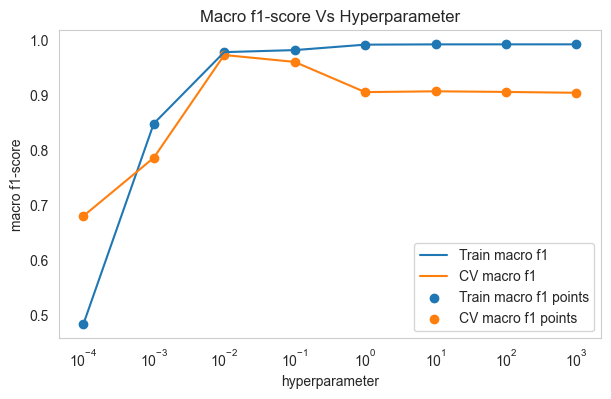

In [27]:
# plotting cross validation result
get_cv_plot(clf, 'param_C')

In [28]:
# C:Inverse of regularization strength
param_C = 0.01

In [29]:
clf.score(X_test,y_test)

0.9836806589899147

Macro F1-Score:0.9837 

Confusion Matrix


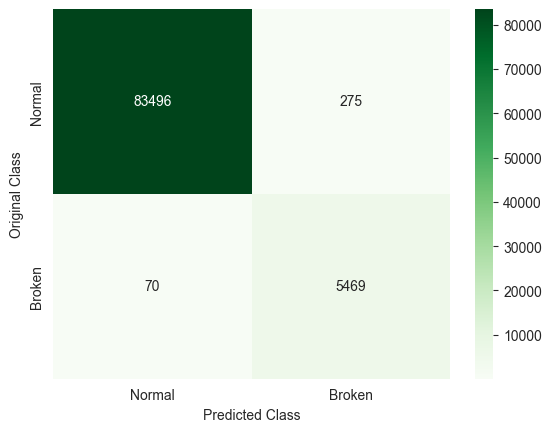

In [30]:
# traing with best C value
log_reg = LogisticRegression(C=param_C, n_jobs=-1, random_state=21)
log_reg.fit(X_train, y_train)
get_result(log_reg, X_test, y_test)

In [31]:
# svm model
svm_clf = SGDClassifier(loss='hinge', penalty='l2', n_jobs=-1, random_state=21)

# parameter to tune
# alpha: regularization strength
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# defining model to tune hyperparameter
svm_cv = GridSearchCV(estimator=svm_clf,
                        param_grid=param_grid,
                        cv=folds,
                        scoring='f1_macro',
                        n_jobs=-1,
                        return_train_score=True)

# fit the model to train data
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SGDClassifier(n_jobs=-1, random_state=21), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='f1_macro')

In [32]:
svm_cv.best_score_

0.9742892994292278

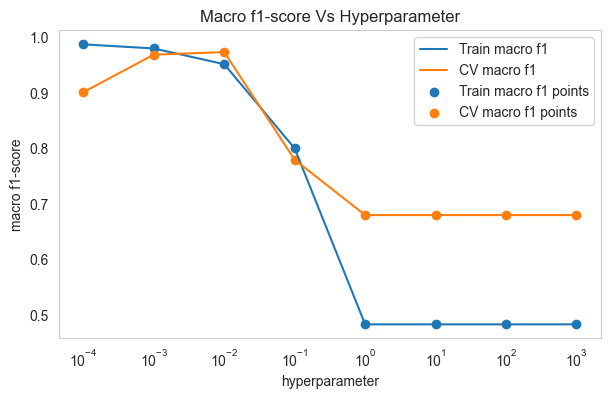

In [33]:
# plotting cross validation result
get_cv_plot(svm_cv, 'param_alpha')

In [34]:
# alpha: regularization strength
param_alpha = 0.01

Macro F1-Score:0.964 

Confusion Matrix


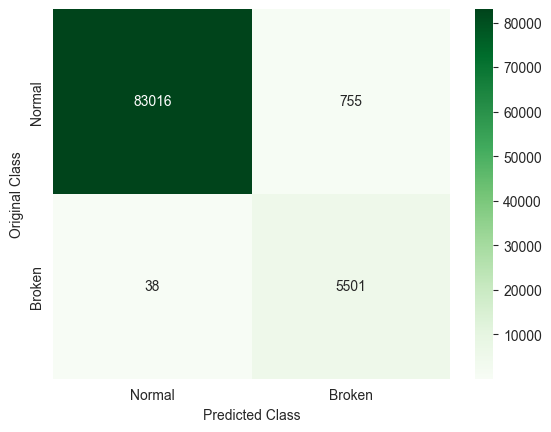

In [35]:
# traing with best alpha value
svm_clf = SGDClassifier(loss='hinge', alpha=param_alpha, penalty='l2', 
                        n_jobs=-1, random_state=21)
svm_clf.fit(X_train, y_train)

get_result(svm_clf, X_test, y_test)

In [36]:
# random forest model
r_forest_clf = RandomForestClassifier(criterion='gini', 
                                      random_state=21, 
                                      n_jobs=-1)

# parameter to tune
# n_estimators: number of estimators
# max_depth: maximum depth of the tree
param_grid = {'n_estimators': [10, 25, 50, 100,150, 200],
                'max_depth': [1, 3, 5, 10, 20, 30, 50]}

# defining model to tune hyperparameter
r_forest_cv = GridSearchCV(estimator=r_forest_clf,
                        param_grid=param_grid,
                        cv=folds,
                        scoring='f1_macro',
                        n_jobs=-1,
                        return_train_score=True)

r_forest_cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10, 20, 30, 50],
                         'n_estimators': [10, 25, 50, 100, 150, 200]},
             return_train_score=True, scoring='f1_macro')

In [37]:
r_forest_cv.best_score_

0.9923785819961622

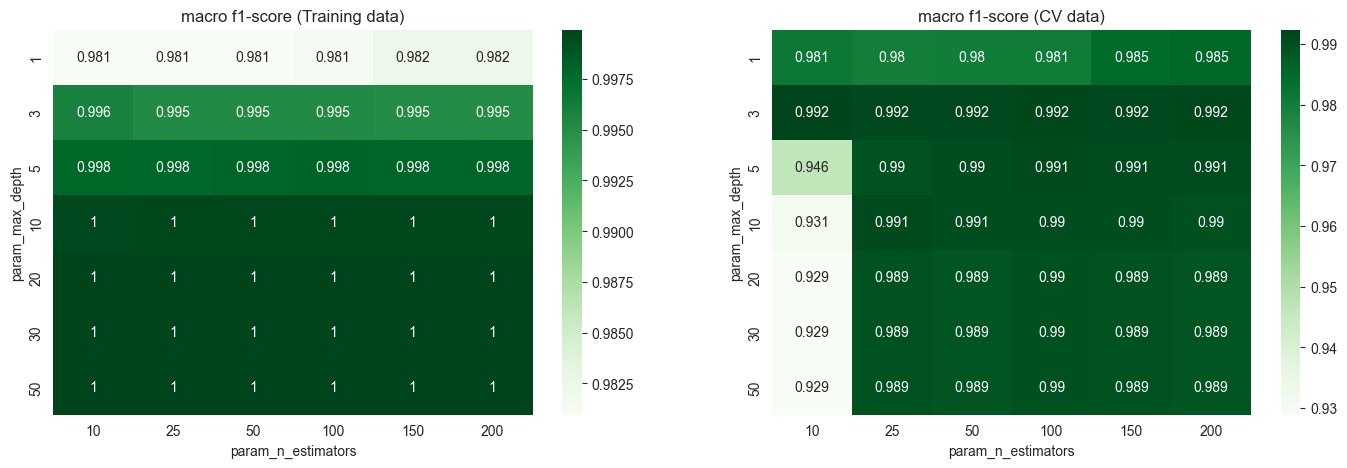

In [38]:
# plotting cross validation result
get_cv_heatmap(r_forest_cv)

In [39]:
# max_depth: maximum depth of the tree
max_depth = 5
# n_estimators: number of estimators
n_estimator = 25

Macro F1-Score:0.9968 

Confusion Matrix


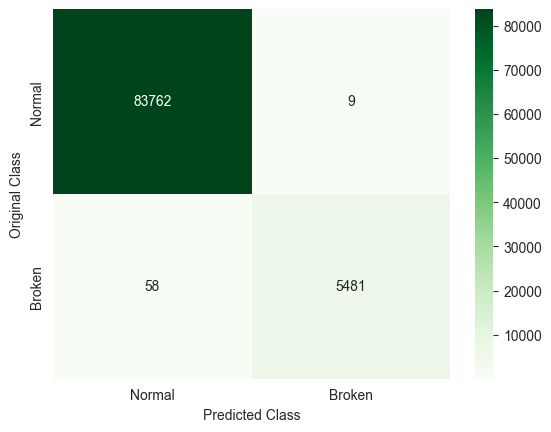

In [40]:
# traing with optimum tree depth and number of estimators
r_forest_clf = RandomForestClassifier(n_estimators=n_estimator, criterion='gini', 
max_depth=max_depth, random_state=21, n_jobs=-1)

r_forest_clf.fit(X_train, y_train)

get_result(r_forest_clf, X_test, y_test)

In [41]:
# XGBoost classifier
xgb_clf = XGBClassifier()

# parameter to tune
# n_estimators: number of estimators
# max_depth: maximum depth of the tree
param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50],
                'max_depth': [1, 3, 5, 7, 10, 20, 30]}

# defining model to tune hyperparameter
xgb_cv = GridSearchCV(estimator=xgb_clf,
                        param_grid=param_grid,
                        cv=folds,
                        scoring='f1_macro',
                        n_jobs=-1,
                        return_train_score=True)

# fit model to train data
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, im...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 10, 20, 30],
                         'n_estimators': [5, 10, 20, 30, 40, 50]},
             return_train_score=True, scoring='f1_macro')

In [42]:
xgb_cv.best_score_

0.9814662550558181

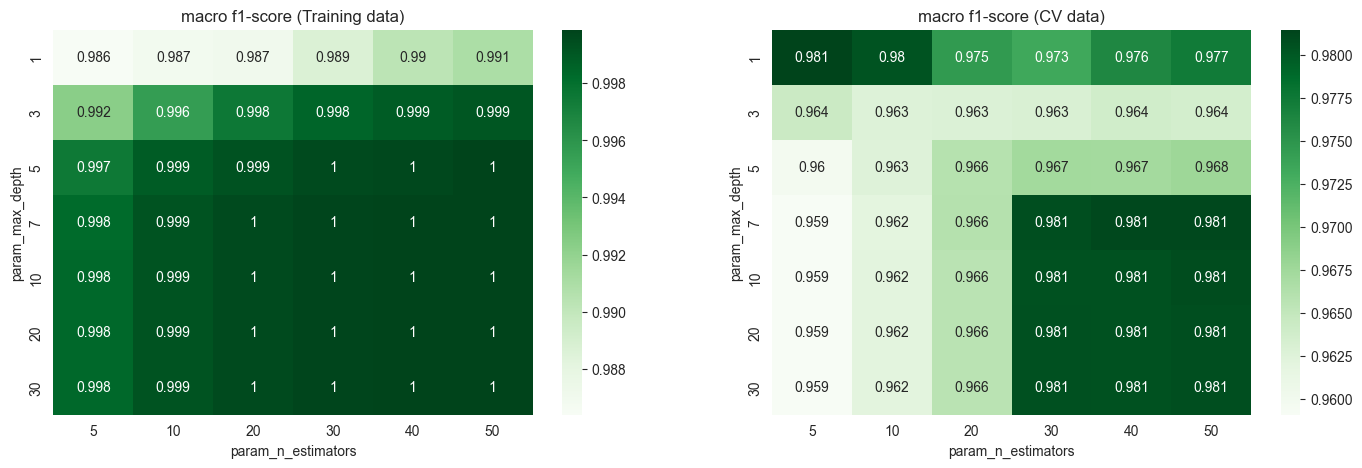

In [43]:
# plotting cross validation result
get_cv_heatmap(xgb_cv)

In [44]:
# optimum parameters
max_depth = 1
n_estimator = 5

In [45]:
# traing with optimum tree depth and number of estimators
xgb_clf = XGBClassifier(n_estimators=n_estimator, max_depth=max_depth)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Macro F1-Score:0.9963 

Confusion Matrix


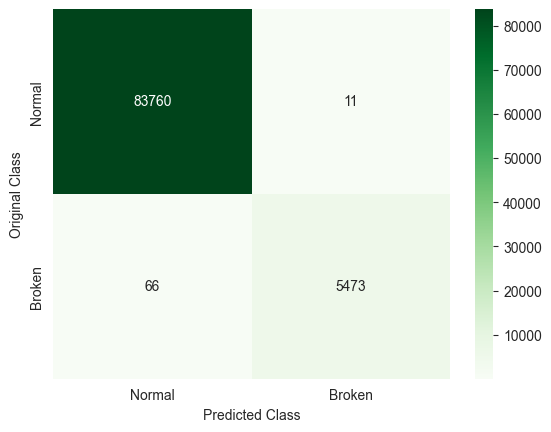

In [46]:
get_result(xgb_clf, X_test, y_test)

In [47]:
def get_mean_features(sensor_list, df):
    """
    Function to get mean val of 10min window
    """

    new_features = {}

    # looping over all sensors and calculating mean of 10 values
    for sensor in sensor_list:
        new_features[sensor] = df[sensor].rolling(10).mean().values

    labels = []
    # creating list with None value
    labels = [None] * (df.shape[0])

    for i in range(0, df.shape[0]-10):
        labels[i+9] = df['label'][i+10]

    new_features['label'] = labels

    # creating dataframe
    new_df = pd.DataFrame(new_features)
    # removing first 9 rows with null values
    new_df.drop(new_df.head(9).index, inplace=True)
    # resetting index 
    new_df.reset_index(inplace=True, drop=True)
    # dropping last row with null value
    new_df.drop(new_df.tail(1).index, inplace=True)
    return new_df

In [48]:
# mean value dataframe
data_mean_vals = get_mean_features(sensor_data.columns[1:-1], sensor_data)
data_mean_vals.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,label
0,2.454966,47.131073,53.18576,46.380206,634.75692,75.898200,13.358651,16.155959,15.698062,15.084637,...,42.057288,38.888888,62.615740,51.186343,38.715276,166.98494,67.795142,242.27431,201.64930,0.0
1,2.454867,47.170136,53.17708,46.388887,635.09256,75.857373,13.358651,16.159576,15.706742,15.091147,...,42.005205,38.859953,61.545138,51.186343,38.831017,170.28355,68.142364,243.05556,201.50462,0.0
2,2.452801,47.252601,53.17274,46.397568,635.21988,75.670052,13.358651,16.163193,15.734954,15.097657,...,41.979163,38.831018,60.358795,51.215278,38.917823,173.84258,68.605326,244.06829,201.38888,0.0
3,2.454375,47.343747,53.16406,46.397568,634.34025,76.011442,13.360821,16.176213,15.746528,15.097657,...,42.083330,38.831018,59.143517,51.186343,39.004629,177.80671,69.126159,245.25464,201.24420,0.0
4,2.453195,47.478296,53.16406,46.397568,635.39349,75.879854,13.360821,16.168255,15.761719,15.106337,...,42.265622,38.975694,58.043980,51.128472,39.091435,181.85764,69.733797,246.49885,201.21526,0.0


In [49]:
final_sensors = ['sensor_00', 'sensor_04', 'sensor_06', 'sensor_07', 
                 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 
                 'sensor_12']

In [50]:
# dataframe of final sensors
df_mean_vals = data_mean_vals[final_sensors]
df_mean_vals['label'] = data_mean_vals['label']
df_mean_vals.head()

,sensor_00,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,label
0,2.454966,634.75692,13.358651,16.155959,15.698062,15.084637,38.330033,48.994831,31.842780,0.0
1,2.454867,635.09256,13.358651,16.159576,15.706742,15.091147,38.597492,49.291350,32.011140,0.0
2,2.452801,635.21988,13.358651,16.163193,15.734954,15.097657,38.853273,49.617748,32.213983,0.0
3,2.454375,634.34025,13.360821,16.176213,15.746528,15.097657,39.070780,49.850504,32.351415,0.0
4,2.453195,635.39349,13.360821,16.168255,15.761719,15.106337,39.303099,50.081416,32.547885,0.0


In [51]:
# y data
data_y = df_mean_vals['label']
# x data
data_x = df_mean_vals.drop(columns='label')

train_dataPoints = 131000

X_train = data_x[:train_dataPoints]
y_train = data_y[:train_dataPoints]

X_test = data_x[train_dataPoints : ]
y_test = data_y[train_dataPoints : ]

In [53]:
print("Training data")
print()
#get_class_distribution(y_train)
percentage_cls_distrib(y_train)

Training data

% Normal class data points = 93.17
% Broken class data points= 6.83


In [55]:
print("Test data")
print()
#get_class_distribution(y_test)
percentage_cls_distrib(y_test)

Test data

% Normal class data points = 93.8
% Broken class data points= 6.2


In [56]:
X_train, X_test = normalize_df(X_train, X_test)

In [57]:
X_train.head()

,sensor_00,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0.975636,0.958281,0.664295,0.710276,0.689831,0.695478,0.533461,0.816886,0.738610
1,0.975608,0.958790,0.664295,0.710426,0.690190,0.695759,0.537183,0.821820,0.742503
2,0.975025,0.958983,0.664295,0.710575,0.691355,0.696041,0.540743,0.827250,0.747193
3,0.975469,0.957649,0.664395,0.711115,0.691833,0.696041,0.543770,0.831123,0.750371
4,0.975136,0.959247,0.664395,0.710785,0.692461,0.696416,0.547004,0.834965,0.754914


In [58]:
X_test.head()

,sensor_00,sensor_04,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
131000,0.0,0.000507,0.0,0.0,0.0,0.0,0.003765,0.002819,0.002312
131001,0.0,0.000461,0.0,0.0,0.0,0.0,0.003765,0.002819,0.002312
131002,0.0,0.000414,0.0,0.0,0.0,0.0,0.003765,0.002819,0.002312
131003,0.0,0.000414,0.0,0.0,0.0,0.0,0.003765,0.002819,0.002312
131004,0.0,0.000420,0.0,0.0,0.0,0.0,0.003765,0.002819,0.002312


In [59]:
# Logistic regression model
log_reg = LogisticRegression(n_jobs=-1, random_state=21)

# parameter to tune
# C: Inverse of regularization strength
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# defining model to tune hyperparameter
clf = GridSearchCV(estimator=log_reg,
                        param_grid=param_grid,
                        cv=folds,
                        scoring='f1_macro',
                        n_jobs=-1,
                        return_train_score=True)

# fit the model to train data
clf.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LogisticRegression(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='f1_macro')

In [60]:
# C:Inverse of regularization strength
param_C = 0.01

Macro F1-Score:0.9844 

Confusion Matrix


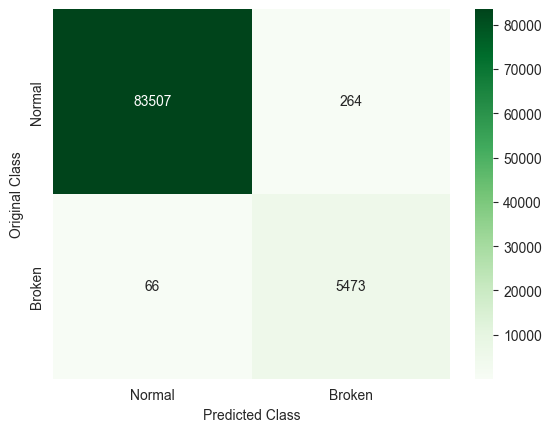

In [61]:
# traing with best C value
log_reg = LogisticRegression(C=param_C, n_jobs=-1, random_state=21)
log_reg.fit(X_train, y_train)
get_result(log_reg, X_test, y_test)

In [62]:
# svm model
svm_clf = SGDClassifier(loss='hinge', penalty='l2', n_jobs=-1, random_state=21)

# parameter to tune
# alpha: regularization strength
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# defining model to tune hyperparameter
svm_cv = GridSearchCV(estimator=svm_clf,
                        param_grid=param_grid,
                        cv=folds,
                        scoring='f1_macro',
                        n_jobs=-1,
                        return_train_score=True)

# fit the model to train data
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SGDClassifier(n_jobs=-1, random_state=21), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='f1_macro')

In [63]:
# alpha: regularization strength
param_alpha = 0.01

Macro F1-Score:0.9637 

Confusion Matrix


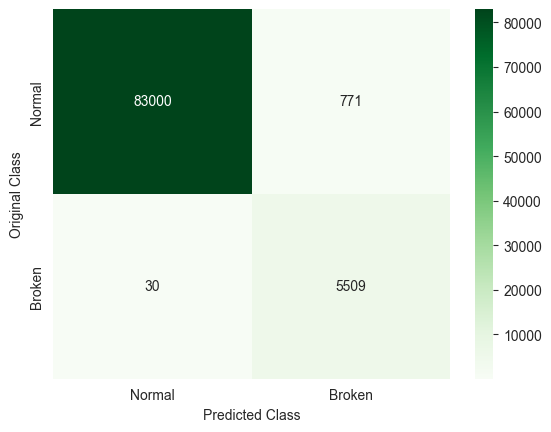

In [64]:
# traing with best alpha value
svm_clf = SGDClassifier(loss='hinge', alpha=param_alpha, penalty='l2', 
                        n_jobs=-1, random_state=21)
svm_clf.fit(X_train, y_train)
get_result(svm_clf, X_test, y_test)

In [65]:
# random forest model
r_forest_clf = RandomForestClassifier(criterion='gini', 
                                      random_state=21, 
                                      n_jobs=-1)

# parameter to tune
# n_estimators: number of estimators
# max_depth: maximum depth of the tree
param_grid = {'n_estimators': [10, 20, 30, 40, 50],
                'max_depth': [1, 3, 5, 10, 30]}

# defining model to tune hyperparameter
r_forest_cv = GridSearchCV(estimator=r_forest_clf,
                        param_grid=param_grid,
                        cv=folds,
                        scoring='f1_macro',
                        n_jobs=-1,
                        return_train_score=True)

r_forest_cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=21),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 10, 30],
                         'n_estimators': [10, 20, 30, 40, 50]},
             return_train_score=True, scoring='f1_macro')

In [66]:
# # optimum parameters
# n_estimator = 10
# max_depth = 3

# max_depth: maximum depth of the tree
max_depth = 3
# n_estimators: number of estimators
n_estimator = 10

Macro F1-Score:0.9973 

Confusion Matrix


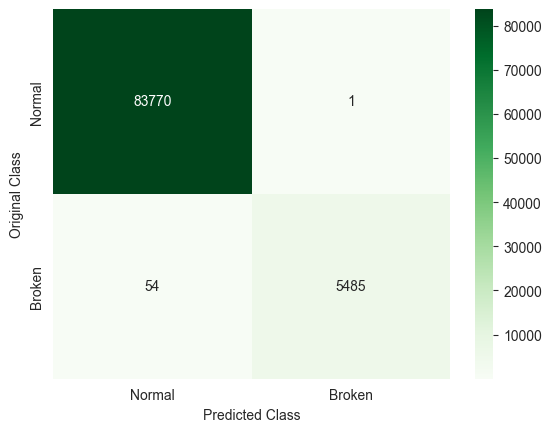

In [67]:
# traing with optimum tree depth and number of estimators
r_forest_clf = RandomForestClassifier(n_estimators=n_estimator, criterion='gini', 
max_depth=max_depth, random_state=21, n_jobs=-1)

r_forest_clf.fit(X_train, y_train)

get_result(r_forest_clf, X_test, y_test)

In [68]:
# XGBoost model
xgb_clf = XGBClassifier()

# parameter to tune
# n_estimators: number of estimators
# max_depth: maximum depth of the tree
param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50],
                'max_depth': [1, 3, 5, 7, 10, 20]}

# defining model to tune hyperparameter
xgb_cv = GridSearchCV(estimator=xgb_clf,
                        param_grid=param_grid,
                        cv=folds,
                        scoring='f1_macro',
                        n_jobs=-1,
                        return_train_score=True)

xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, im...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 10, 20],
                         'n_estimators': [5, 10, 20, 30, 40, 50]},
             return_train_score=True, scoring='f1_macro')

In [69]:
# max_depth: maximum depth of the tree
max_depth = 1
# n_estimators: number of estimators
n_estimator = 5

In [70]:
# traing with optimum tree depth and number of estimators
xgb_clf = XGBClassifier(n_estimators=n_estimator, max_depth=max_depth)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
table = PrettyTable()
table.field_names = ["Model", "Feature", "Macro_F1", "Misclassifications"]
table.add_row(["Logistic Regression", " ", 0.9837, 345])
table.add_row(["SVM", " Distance from mean", 0.9640, 793])
table.add_row(["Random Forest", "of normal state", 0.9968, 67])
table.add_row(["XGBoost", " ", 0.9963, 76])
table.add_row(["-------------------", "------------------", 
"--------", "------------------"])
table.add_row(["Logistic Regression", " ", 0.9844, 330])                              
table.add_row(["SVM", "Mean value of", 0.9637, 801])
table.add_row(["Random Forest", "10 min window", 0.9973, 55])
table.add_row(["XGBoost", " ", 0.9973, 56])
print(table)

+---------------------+---------------------+----------+--------------------+
|        Model        |       Feature       | Macro_F1 | Misclassifications |
+---------------------+---------------------+----------+--------------------+
| Logistic Regression |                     |  0.9837  |        345         |
|         SVM         |  Distance from mean |  0.964   |        793         |
|    Random Forest    |   of normal state   |  0.9968  |         67         |
|       XGBoost       |                     |  0.9963  |         76         |
| ------------------- |  ------------------ | -------- | ------------------ |
| Logistic Regression |                     |  0.9844  |        330         |
|         SVM         |    Mean value of    |  0.9637  |        801         |
|    Random Forest    |    10 min window    |  0.9973  |         55         |
|       XGBoost       |                     |  0.9973  |         56         |
+---------------------+---------------------+----------+--------